A continuación se presentan los códigos respectivos a los ejercicios planteados en la Tarea 03 de la Unidad 01 del aula virtual.

**Grupo 3 - Integrantes**

*   Arias Joffre
* Fiallos Fátima
* Flores Byron
* Hurtado Kevin
* Lechón Cristian
* Pila Jordi
* Pujota Angelo
* Tipán Edgar

# **Cifrados por Transposición (Ejercicio 1)**
---

Algoritmo que escriba todas las permutaciones posibles de una palabra de longitud n SIN espacios (Anagrama). La palabra se ingresa al iniciar el algoritmo. El algoritmo debe mostrar el número total de permutaciones y las 10 primeras ordenadas alfabéticamente.

In [ ]:
import itertools

def generarAnagramas(palabra):
    if not palabra:
        print("La palabra no puede estar vacía.")
        return
    permutaciones = set(itertools.permutations(palabra))
    anagramas = [''.join(p) for p in permutaciones]
    anagramas.sort()

    print(f"Número total de permutaciones: {len(anagramas)}")
    print("Primeras 10 permutaciones ordenadas alfabéticamente:")
    for anagrama in anagramas[:10]:
        print(anagrama)

palabra = input("Ingrese una palabra: ").replace(" ", "")
generarAnagramas(palabra)

Ingrese una palabra: murcielago
Número total de permutaciones: 3628800
Primeras 10 permutaciones ordenadas alfabéticamente:
acegilmoru
acegilmour
acegilmrou
acegilmruo
acegilmuor
acegilmuro
acegilomru
acegilomur
acegilormu
acegilorum


# **Cifrado de Transposición por Filas (Ejercicio 2)**
---

Algoritmo que realice el cifrado de un mensaje por permutación de filas, teniendo como clave n filas. Tanto n como el texto del mensaje se ingresan al iniciar el algoritmo. El algoritmo debe controlar que el número de caracteres del mensaje (sin espacios), sea menor o igual que n x n. Imprima la matriz de cifrado, el mensaje original y el mensaje cifrado. Si en la matriz de cifrado sobran espacios para almacenar los caracteres del mensaje original, estos deben llenarse con "*".

In [ ]:
import random

def crearMatriz(mensaje, n):
    matriz = []
    index = 0
    for _ in range(n):
        fila = []
        for _ in range(n):
            if index < len(mensaje):
                fila.append(mensaje[index])
                index += 1
            else:
                fila.append("*")
        matriz.append(fila)
    return matriz

def imprimirMatriz(matriz):
    for fila in matriz:
        print(" ".join(fila))

def transponerMatriz(matriz):
    return [list(col) for col in zip(*matriz)]

def cifrarMensaje(matriz):
    matriz_transpuesta = transponerMatriz(matriz)
    mensaje_cifrado = "".join("".join(fila) for fila in matriz_transpuesta)
    return mensaje_cifrado

while True:
    try:
        n = int(input("Ingrese el número de filas (n): "))
        if n <= 0:
            print("El número debe ser mayor que 0. Inténtalo de nuevo.")
        else:
            break
    except ValueError:
        print("Entrada no válida. Por favor, ingresa un número entero.")

while True:
    mensaje = input("Ingrese el mensaje: ").replace(" ", "")
    if mensaje:
        break
    else:
        print("El mensaje no puede estar vacío. Inténtalo de nuevo.")

limite = n * n
if len(mensaje) > limite:
    print(f"El mensaje es demasiado largo. Máximo permitido: {limite} caracteres.")
else:
    matriz = crearMatriz(mensaje, n)
    print("\nMatriz original:")
    imprimirMatriz(matriz)
    print(f"\nMensaje original: {mensaje}")
    orden = list(range(n))
    random.shuffle(orden)
    matriz_permutada = [matriz[i] for i in orden]
    print("\nMatriz con filas permutadas:")
    imprimirMatriz(matriz_permutada)
    mensaje_cifrado = cifrarMensaje(matriz_permutada)
    print(f"\nMensaje cifrado: {mensaje_cifrado}")
    print(f"Orden de permutación de filas usado: {orden}")

Ingrese el número de filas (n): 3
Ingrese el mensaje: hola mundo

Matriz original:
h o l
a m u
n d o

Mensaje original: holamundo

Matriz con filas permutadas:
n d o
h o l
a m u

Mensaje cifrado: nhadomolu
Orden de permutación de filas usado: [2, 0, 1]


# **Cifrado de Transposición por Columnas (Ejercicio 3)**

---

Algoritmo que realice el cifrado de un mensaje por permutación de columnas, teniendo como clave n columnas. Tanto n como el texto del mensaje se ingresan al iniciar el algoritmo. El algoritmo debe controlar que el número de caracteres del mensaje (sin espacios), sea menor o igual que n x n. Imprima la matriz de cifrado, el mensaje original y el mensaje cifrado.  Si en la matriz de cifrado sobran espacios para almacenar los caracteres del mensaje original, estos deben llenarse con "*".

In [ ]:
def es_entero_positivo(valor):
    try:
        numero = int(valor)
        return numero > 0
    except ValueError:
        return False

while True:
    n_input = input("Ingrese el número de columnas (n): ")
    if not es_entero_positivo(n_input):
        print("Error: Debe ingresar un número entero positivo.")
    else:
        n = int(n_input)
        break

while True:
    mensaje = input("Ingrese el mensaje a cifrar: ").strip()
    if not mensaje:
        print("Error: El mensaje no puede estar vacío.")
    else:
        break

mensaje_sin_espacios = mensaje.replace(" ", "")
longitud = len(mensaje_sin_espacios)

filas = (longitud + n - 1) // n

relleno = filas * n - longitud
mensaje_completo = mensaje_sin_espacios + "*" * relleno

matriz = []
indice = 0
for i in range(filas):
    fila = []
    for j in range(n):
        fila.append(mensaje_completo[indice])
        indice += 1
    matriz.append(fila)

print("\n--- Matriz Original (por filas) ---")
for fila in matriz:
    print(" ".join(fila))

permutacion = list(range(n))
permutacion.reverse()  # Por ejemplo: [2, 1, 0] si n = 3
print("\nPermutación de columnas aplicada automáticamente:", permutacion)

# Aplicar permutación de columnas
matriz_permutada = []
for fila in matriz:
    nueva_fila = [fila[permutacion[i]] for i in range(n)]
    matriz_permutada.append(nueva_fila)

print("\n--- Matriz con columnas permutadas ---")
for fila in matriz_permutada:
    print(" ".join(fila))

# Transponer la matriz
transpuesta = []
for j in range(n):
    nueva_fila = []
    for i in range(filas):
        nueva_fila.append(matriz_permutada[i][j])
    transpuesta.append(nueva_fila)

mensaje_cifrado = ""
for j in range(n):
    for i in range(filas):
        mensaje_cifrado += transpuesta[j][i]

print("\n--- Mensaje Cifrado ---")
print(mensaje_cifrado)

Ingrese el número de columnas (n): 3
Ingrese el mensaje a cifrar: hola mundo

--- Matriz Original (por filas) ---
h o l
a m u
n d o

Permutación de columnas aplicada automáticamente: [2, 1, 0]

--- Matriz con columnas permutadas ---
l o h
u m a
o d n

--- Mensaje Cifrado ---
luoomdhan


# **El cifrado César (Ejercicio 4)**

---

Algoritmo que realice el cifrado de una cadena de caracteres mediante un método de sustitución Monoalfabético de desplazamiento n caracteres a la derecha. Tanto la palabra como el valor de n se ingresan al iniciar el algoritmo. El algoritmo debe mostrar el alfabeto original, el alfabeto cifrado, la cadena de caracteres ingresada y su resultado.

In [ ]:
def cifrado_cesar():
    alfabeto = "ABCDEFGHIJKLMNÑOPQRSTUVWXYZ"

    cadena = input("Ingresa la cadena de caracteres a cifrar: ").strip().upper()
    if not cadena:
        print("Error: No ingresaste ningún texto para cifrar.")
        return

    entrada_n = input("Ingresa el valor de desplazamiento (n): ").strip()
    if not entrada_n:
        print("Error: No ingresaste ningún valor para el desplazamiento.")
        return

    if not entrada_n.isdigit():
        print("Error: El valor de desplazamiento debe ser un número entero no negativo.")
        return

    n = int(entrada_n)
    if n < 0:
        print("Error: No se puede utilizar un número negativo como desplazamiento.")
        return

    n = n % len(alfabeto)
    alfabeto_cifrado = alfabeto[n:] + alfabeto[:n]

    resultado = ""
    for caracter in cadena:
        if caracter in alfabeto:
            indice = alfabeto.index(caracter)
            resultado += alfabeto_cifrado[indice]
        else:
            resultado += caracter

    print("\n--- Resultado ---")
    print("Alfabeto original: ", alfabeto)
    print("Alfabeto cifrado:  ", alfabeto_cifrado)
    print("Cadena ingresada:  ", cadena)
    print("Cadena cifrada:    ", resultado)

if __name__ == "__main__":
    cifrado_cesar()

Ingresa la cadena de caracteres a cifrar: hola mundo
Ingresa el valor de desplazamiento (n): 6

--- Resultado ---
Alfabeto original:  ABCDEFGHIJKLMNÑOPQRSTUVWXYZ
Alfabeto cifrado:   GHIJKLMNÑOPQRSTUVWXYZABCDEF
Cadena ingresada:   HOLA MUNDO
Cadena cifrada:     NUQG RASJU


# **Cifrado De Vigenére (Ejercicio 5)**

---

Algoritmo que realice el cifrado de una cadena de caracteres mediante un método de sustitución Polialfabético de Vigenère. La cadena se ingresa al iniciar el algoritmo. El algoritmo debe mostrar la cadena de caracteres ingresada, la clave de cifrado y la cadena de caracteres cifrada.

In [ ]:
def expandir_clave(mensaje, clave):
    clave_expandida = ''
    indice = 0
    for letra in mensaje:
        if letra.isalpha():
            clave_expandida += clave[indice % len(clave)]
            indice += 1
        else:
            clave_expandida += letra
    return clave_expandida

def mostrar_matriz_vigenere():
    alfabeto = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    matriz = []

    print("\n--- Matriz de Vigenère ---")
    print("   " + " ".join(alfabeto))
    for i in range(26):
        fila = alfabeto[i:] + alfabeto[:i]
        matriz.append(fila)
        print(f"{alfabeto[i]}: " + " ".join(fila))

def cifrar_vigenere(mensaje, clave_expandida):
    mensaje = mensaje.upper()
    mensaje_cifrado = ''

    for m, k in zip(mensaje, clave_expandida):
        if m.isalpha():
            m_pos = ord(m) - ord('A')
            k_pos = ord(k) - ord('A')
            c_pos = (m_pos + k_pos) % 26
            mensaje_cifrado += chr(c_pos + ord('A'))
        else:
            mensaje_cifrado += m

    return mensaje_cifrado

while True:
    mensaje = input("Ingresa el mensaje a cifrar: ").strip()
    if mensaje:
        break
    else:
        print("El mensaje no puede estar vacío. Intenta de nuevo.")

while True:
    clave = input("Ingresa la clave de cifrado (solo letras): ").strip()
    if clave and clave.isalpha():
        break
    elif not clave:
        print("La clave no puede estar vacía. Intenta de nuevo.")
    else:
        print("La clave debe contener solo letras. Intenta de nuevo.")

mensaje_mayus = mensaje.upper()
clave_mayus = clave.upper()
clave_expandida = expandir_clave(mensaje_mayus, clave_mayus)
mensaje_cifrado = cifrar_vigenere(mensaje, clave_expandida)

print("\n--- Resultado ---")
print(f"Mensaje original     : {mensaje}")
print(f"Clave de cifrado     : {clave_expandida}")
print(f"Mensaje cifrado      : {mensaje_cifrado}")

mostrar_matriz_vigenere()

Ingresa el mensaje a cifrar: hola mundo
Ingresa la clave de cifrado (solo letras): auto

--- Resultado ---
Mensaje original     : hola mundo
Clave de cifrado     : AUTO AUTOA
Mensaje cifrado      : HIEO MOGRO

--- Matriz de Vigenère ---
   A B C D E F G H I J K L M N O P Q R S T U V W X Y Z
A: A B C D E F G H I J K L M N O P Q R S T U V W X Y Z
B: B C D E F G H I J K L M N O P Q R S T U V W X Y Z A
C: C D E F G H I J K L M N O P Q R S T U V W X Y Z A B
D: D E F G H I J K L M N O P Q R S T U V W X Y Z A B C
E: E F G H I J K L M N O P Q R S T U V W X Y Z A B C D
F: F G H I J K L M N O P Q R S T U V W X Y Z A B C D E
G: G H I J K L M N O P Q R S T U V W X Y Z A B C D E F
H: H I J K L M N O P Q R S T U V W X Y Z A B C D E F G
I: I J K L M N O P Q R S T U V W X Y Z A B C D E F G H
J: J K L M N O P Q R S T U V W X Y Z A B C D E F G H I
K: K L M N O P Q R S T U V W X Y Z A B C D E F G H I J
L: L M N O P Q R S T U V W X Y Z A B C D E F G H I J K
M: M N O P Q R S T U V W X Y Z A B C D E F G H I

# **Cifrado de Polibio (Ejercicio 6)**
---

Algoritmo que realice el cifrado de una cadena de caracteres utilizando la siguiente tabla de cifrado:

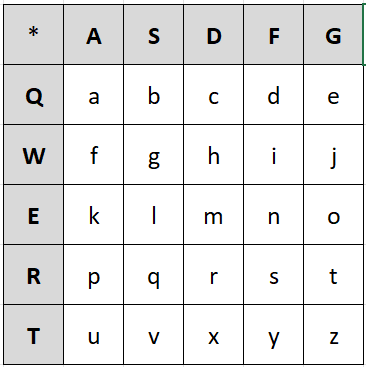


La cadena de caracteres se ingresa al iniciar el programa. Si algún caracter del texto no existe en la matriz, coloque "**". Imprima la matriz de cifrado, el mensaje original y el mensaje cifrado.

In [ ]:
def crear_tabla_cifrado():
    tabla = {}
    filas = ['Q', 'W', 'E', 'R', 'T']
    columnas = ['A', 'S', 'D', 'F', 'G']

    letras = "abcdefghijklmnopqrstuvxyz"
    idx = 0

    for fila in filas:
        for columna in columnas:
            if idx < len(letras):
                tabla[letras[idx]] = fila + columna
                idx += 1
    return tabla

def imprimir_matriz(tabla):
    print("Matriz de Cifrado:")
    print("   A  S  D  F  G")

    filas = ['Q', 'W', 'E', 'R', 'T']
    columnas = ['A', 'S', 'D', 'F', 'G']

    letras = "abcdefghijklmnopqrstuvxyz"
    idx = 0

    for fila in filas:
        print(f"{fila} ", end="")
        for columna in columnas:
            if idx < len(letras):
                print(f" {letras[idx]} ", end="")
                idx += 1
            else:
                print("   ", end="")
        print()

def cifrar_mensaje(mensaje, tabla):
    resultado = ""
    for c in mensaje.lower():
        if c in tabla:
            resultado += tabla[c]
        else:
            resultado += "**"
    return resultado

def main():
    tabla = crear_tabla_cifrado()
    imprimir_matriz(tabla)

    mensaje = input("\nIngrese el mensaje a cifrar: ")

    print("Mensaje original:", mensaje)
    print("Mensaje cifrado:", cifrar_mensaje(mensaje, tabla))

if __name__ == "__main__":
    main()

Matriz de Cifrado:
   A  S  D  F  G
Q  a  b  c  d  e 
W  f  g  h  i  j 
E  k  l  m  n  o 
R  p  q  r  s  t 
T  u  v  x  y  z 

Ingrese el mensaje a cifrar: hola mundo
Mensaje original: hola mundo
Mensaje cifrado: WDEGESQA**EDTAEFQFEG
